---

Applied Statistics

# Problem sheet: Rank correlation

---

### 1. Analyzing Ordinal Data in Penguins' Size and Fish Consumption

Objective: Investigate the relationship between the size of penguins and their fish consumption levels using ordinal data analysis techniques.

The dataset in `fish_consumption.pkl` consists of 300 simulated penguin records with two attributes:

* Size: Categorized as Small, Medium, or Large.
* Fish Consumption: Categorized as Low, Medium, or High.


#### a) Import necessary libraries and load the dataset into a pandas DataFrame. Display the first few rows to understand the dataset's structure.

In [14]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [9]:
data = pd.read_pickle('fish_consumption.pkl')
data

,Size,fish_consumption
0,Medium,Low
1,Large,Low
2,Large,Low
3,Medium,Low
4,Small,Medium
...,...,...
295,Medium,Low
296,Large,High
297,Medium,High
298,Medium,Low


#### b) Create a visualization that shows the relationship between penguin size and fish consumption. Hint: A count plot with hues or stacked bars could be insightful.

<Axes: xlabel='Size', ylabel='count'>

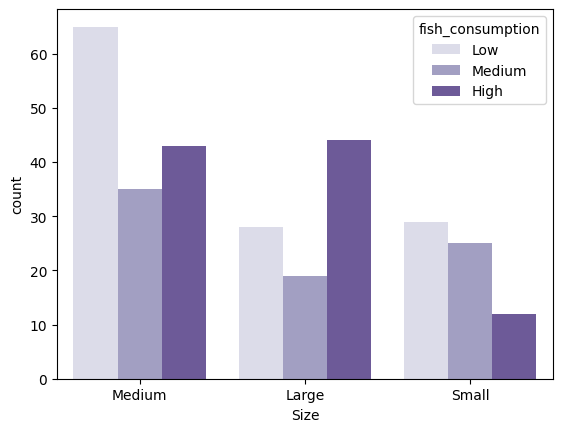

In [7]:
sns.countplot(x='Size', hue='fish_consumption', data=data, palette='Purples')

#### c) Ordinal variables need to be appropriately encoded before analysis.  
Encode the "Size" and "Fish Consumption" variables based on their ordinal nature, with values indicating their order (e.g., Small = 1, Medium = 2, Large = 3).

In [12]:
mapper_size = {'Small': 1, 'Medium': 2, 'Large': 3}
data['Size_ordinal'] = data.Size.replace(mapper_size)

mapper_fish = {'Low': 1, 'Medium': 2, 'High': 3}
data['fish_consumption_ordinal'] = data.fish_consumption.replace(mapper_fish)

data

/var/folders/bk/__83y24x1dl1sbkn593s7sxc0000gn/T/ipykernel_9757/1622924247.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Size_ordinal'] = data.Size.replace(mapper_size)
/var/folders/bk/__83y24x1dl1sbkn593s7sxc0000gn/T/ipykernel_9757/1622924247.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['fish_consumption_ordinal'] = data.fish_consumption.replace(mapper_fish)


,Size,fish_consumption,Size_ordinal,fish_consumption_ordinal
0,Medium,Low,2,1
1,Large,Low,3,1
2,Large,Low,3,1
3,Medium,Low,2,1
4,Small,Medium,1,2
...,...,...,...,...
295,Medium,Low,2,1
296,Large,High,3,3
297,Medium,High,2,3
298,Medium,Low,2,1


<Axes: xlabel='Size', ylabel='count'>

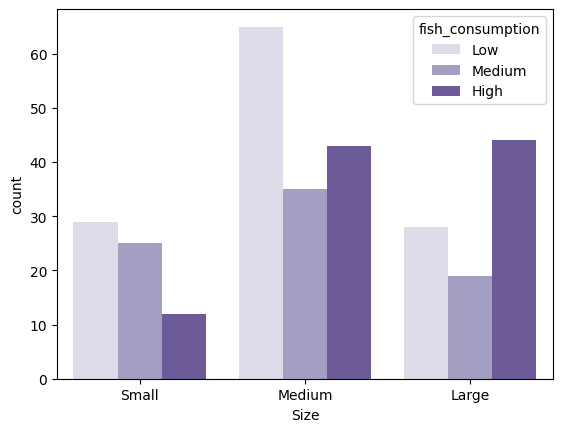

In [13]:
data.sort_values(['Size_ordinal', 'fish_consumption_ordinal'], inplace=True)
sns.countplot(x='Size', hue='fish_consumption', data=data, palette='Purples')

#### d) Analyze the relationship between the size of the penguins and their fish consumption levels using Spearman's rank correlation coefficient, carry out a correlation test and interpret the result.

In [17]:
spearman_corr, spearman_p_value = stats.spearmanr(data.Size_ordinal, data.fish_consumption_ordinal)

print(f"Spearman Correlation: {spearman_corr:.3f}")
print(f"P-Value: {spearman_p_value:.3f}")

Spearman Correlation: 0.187
P-Value: 0.001


#### e) Would it also make sense to compute a Pearson correlation? Why (or why not)?

No, because it is not meaningful for ordinal variables.

### 2. Spearman's Rank Correlation vs. Pearson's Correlation

#### a) Compute Pearson's Correlation Coefficient and Spearman's Rank Correlation Coefficient for the data in `corr_data.pkl`.

In [18]:
data = pd.read_pickle('corr_data.pkl')
data

,X,Y
0,0.292881,1.754021e+01
1,1.291136,4.048874e+05
2,0.616580,4.766488e+02
3,0.269299,1.323956e+01
4,-0.458071,1.498500e+00
...,...,...
95,-1.900852,6.815945e-01
96,0.519078,1.788045e+02
97,-2.879355,-6.895498e-01
98,1.973640,3.727438e+08


In [21]:
p_corr, p_p_value = stats.pearsonr(data.X, data.Y)
s_corr, s_p_value = stats.spearmanr(data.X, data.Y)

print(f"Pearson's Correlation: {p_corr:.3f}")
print(f"Spearman's Correlation: {s_corr:.3f}")

Pearson's Correlation: 0.390
Spearman's Correlation: 0.894


#### b) What do you observe from the results?

Spearman's correlation is much higher than Person's one, because the relationship is not linear.

#### c) Visualize the data to confirm your answer.

<Axes: xlabel='X', ylabel='Y'>

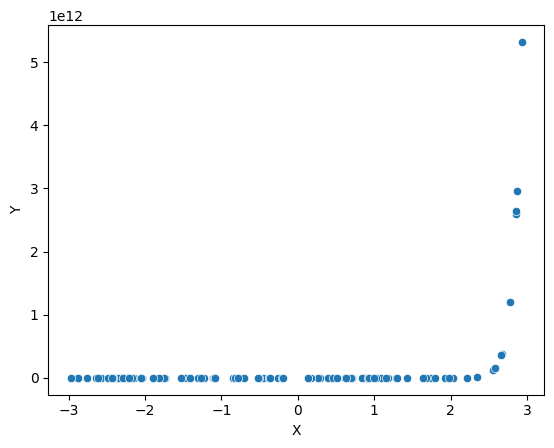

In [22]:
sns.scatterplot(x='X', y='Y', data=data)